<a href="https://colab.research.google.com/github/melsubair/Subair/blob/master/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np


# visualization
import seaborn as sns           
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#baselie model libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense,Flatten



# warning ignore
import warnings 
warnings.filterwarnings('ignore')

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [15]:
import io
data = pd.read_csv(io.StringIO(uploaded['Churn_Modelling.csv'].decode('utf-8')))

In [18]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
sum(data.duplicated())

0

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


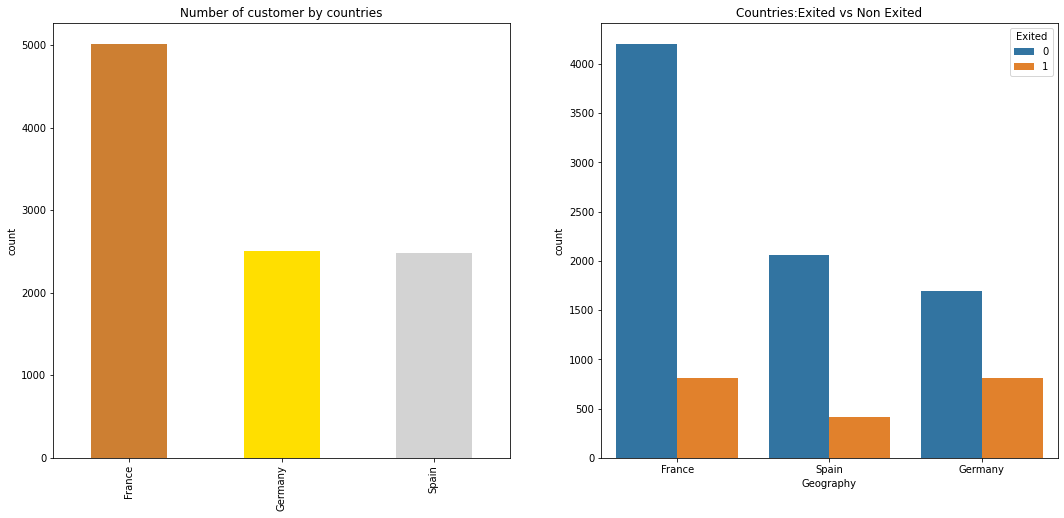

In [24]:
#Countries: Geographcial reason of exited customer?
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Geography'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of customer by countries')
ax[0].set_ylabel('count')
sns.countplot(data=data,x='Geography',hue='Exited',ax=ax[1])
ax[1].set_title('Countries:Exited vs Non Exited')
ax[1].set_ylabel('count');

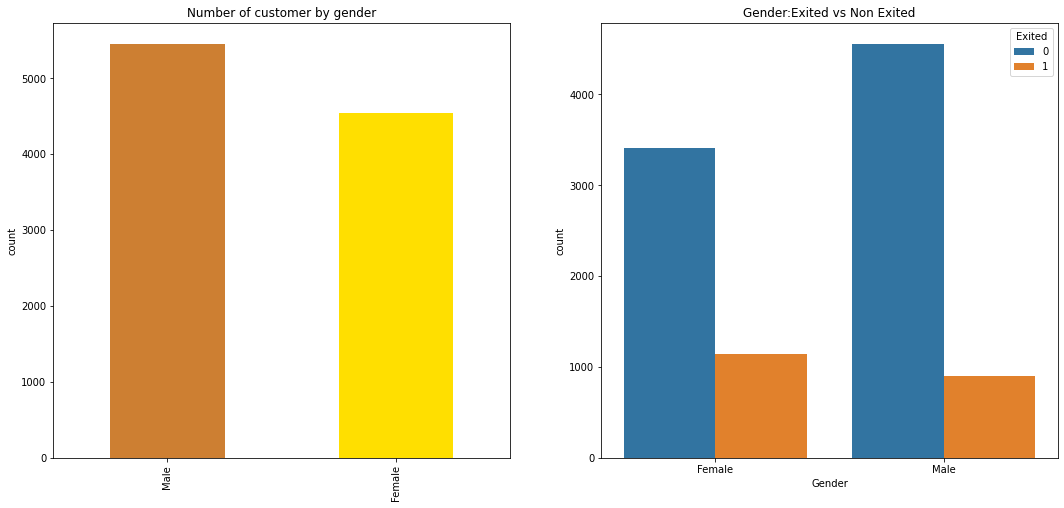

In [25]:
#Gender: relationship of exited customer and sex?
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Gender'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of customer by gender')
ax[0].set_ylabel('count')
sns.countplot(data=data,x='Gender',hue='Exited',ax=ax[1])
ax[1].set_title('Gender:Exited vs Non Exited')
ax[1].set_ylabel('count');

In [26]:
#Age: which age group prefer to leave ?
Non_Exited = data[data['Exited']==0]
Exited = data[data['Exited']==1]

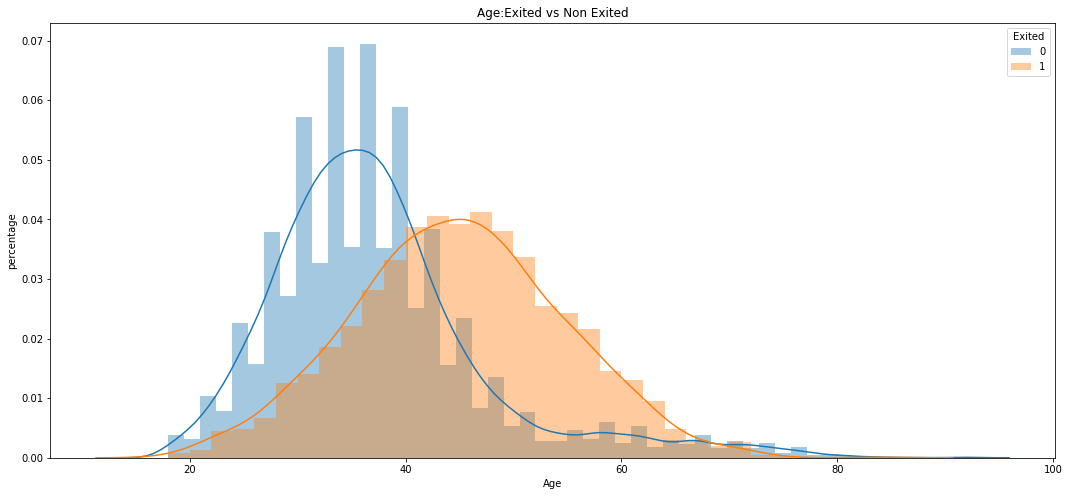

In [27]:
plt.subplots(figsize=(18,8))
sns.distplot(Non_Exited['Age'])
sns.distplot(Exited['Age'])
plt.title('Age:Exited vs Non Exited')
plt.legend([0,1],title='Exited')
plt.ylabel('percentage');

In [28]:
#If the customer has more than 1 product will they stay rather than find other providers ?
pd.crosstab(data.NumOfProducts,data.Exited,margins=True).style.background_gradient(cmap='OrRd')

Exited,0,1,All
NumOfProducts,,,
1,3675,1409,5084
2,4242,348,4590
3,46,220,266
4,0,60,60
All,7963,2037,10000


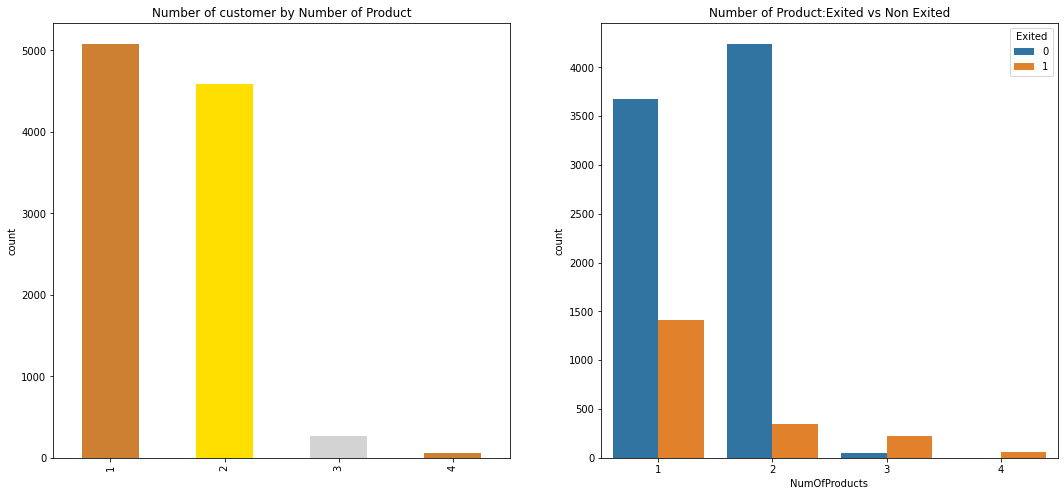

In [29]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['NumOfProducts'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of customer by Number of Product')
ax[0].set_ylabel('count')
sns.countplot(data=data,x='NumOfProducts',hue='Exited',ax=ax[1])
ax[1].set_title('Number of Product:Exited vs Non Exited')
ax[1].set_ylabel('count');

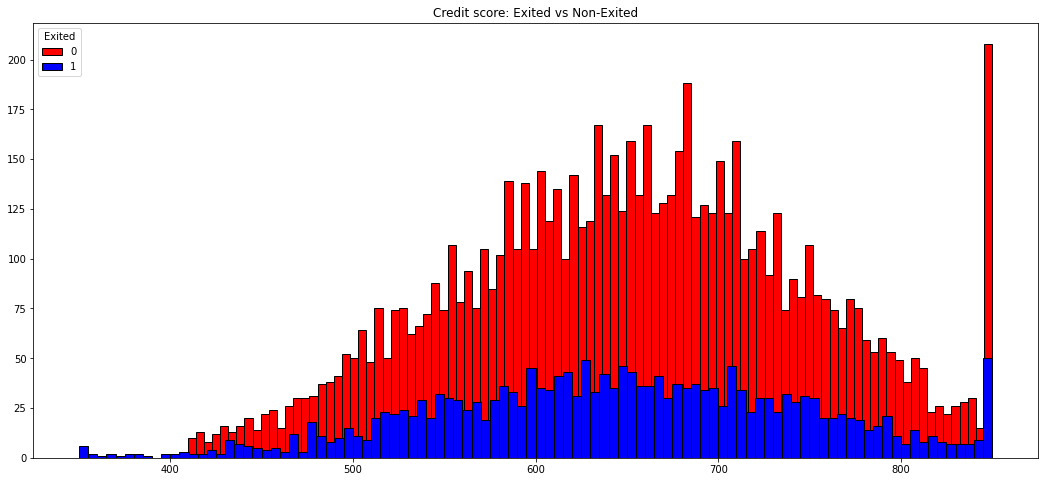

In [30]:
#If customer have higher creditscore are they willing to stay or leave ?
plt.figure(figsize=(18,8))
plt.hist(x='CreditScore',bins=100,data=Non_Exited,edgecolor='black',color='red')
plt.hist(x='CreditScore',bins=100,data=Exited,edgecolor='black',color='blue')
plt.title('Credit score: Exited vs Non-Exited')
plt.legend([0,1],title='Exited');

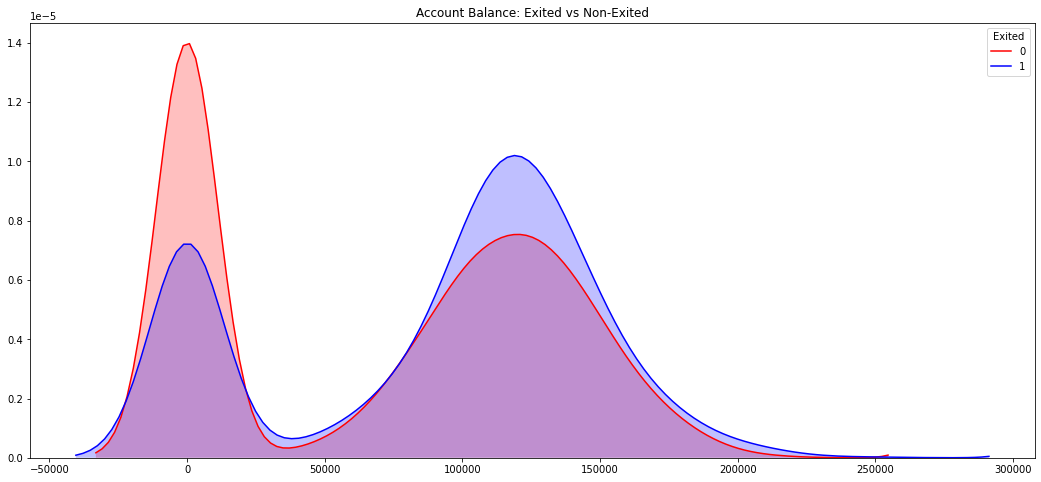

In [31]:
#Won't customer exit when they have a lot of money in the bank account ?
plt.figure(figsize=(18,8))
p1=sns.kdeplot(Non_Exited['Balance'], shade=True, color="r")
p1=sns.kdeplot(Exited['Balance'], shade=True, color="b");
plt.title('Account Balance: Exited vs Non-Exited')
plt.legend([0,1],title='Exited');

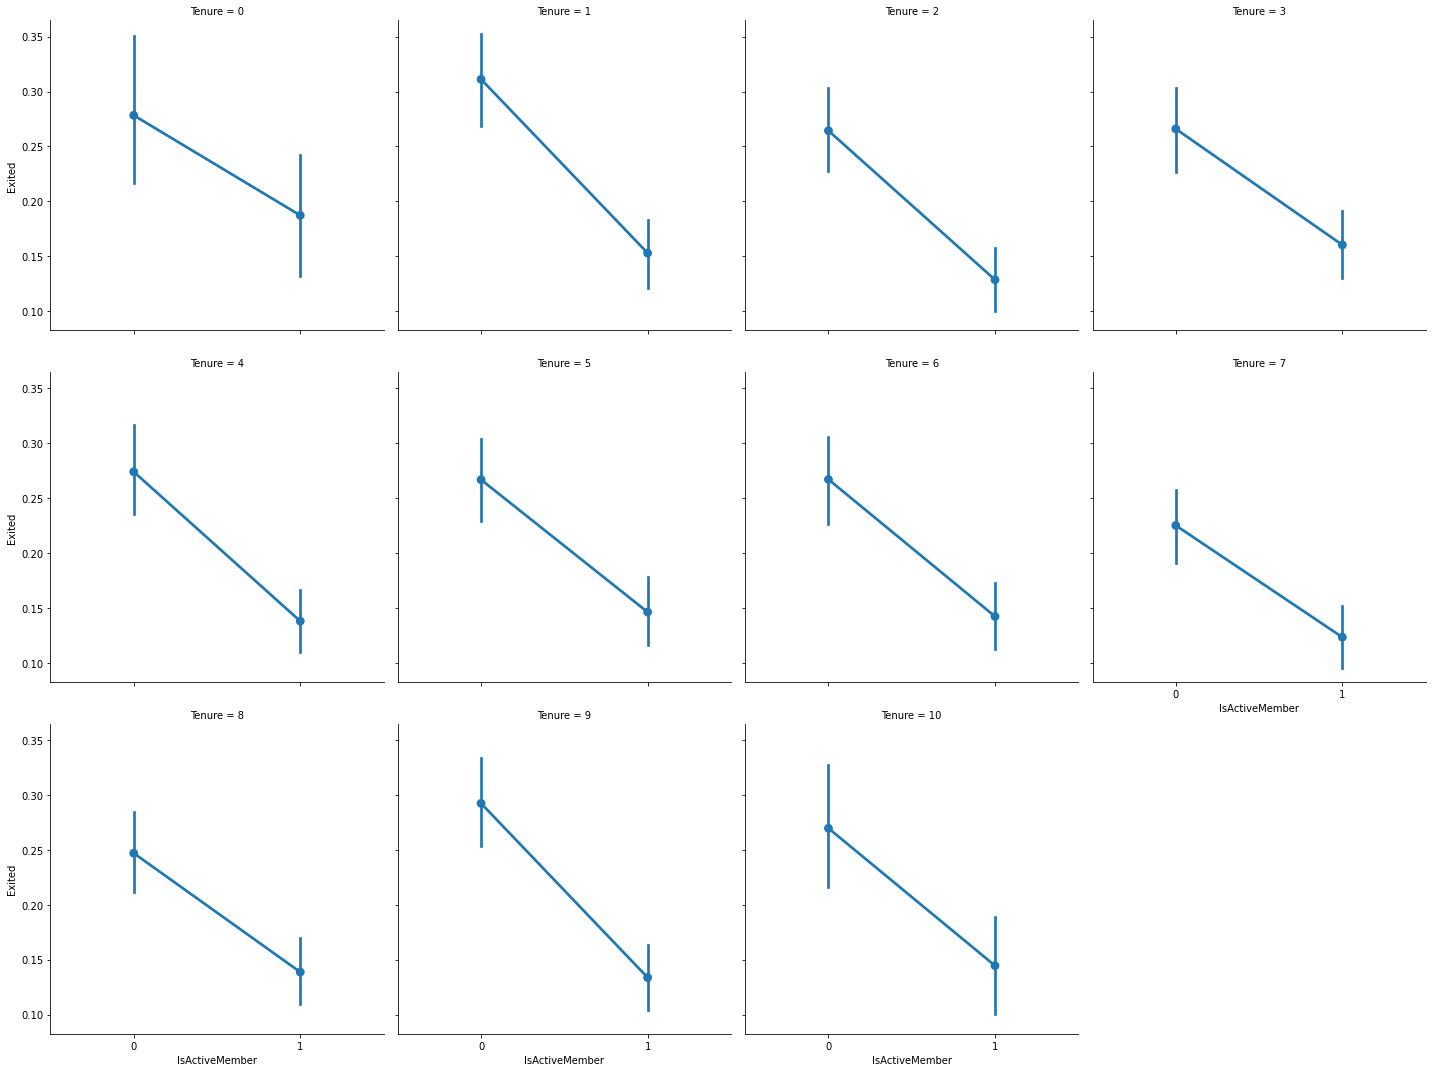

In [32]:
#Can high Tenure & active menber guarantee that the customer will not leave ?
sns.factorplot('IsActiveMember','Exited',col='Tenure',col_wrap=4,data=data);

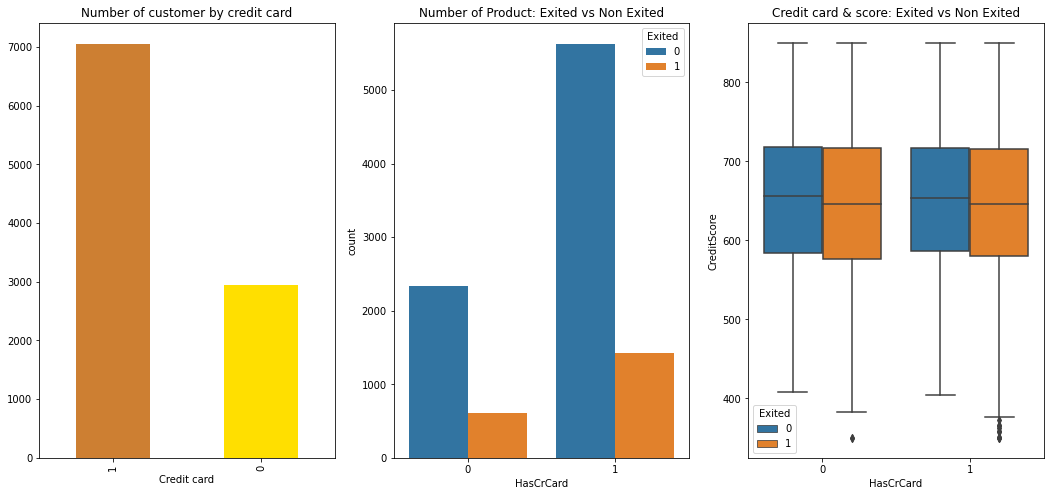

In [33]:
#Which impact does Creditcard have on churn customer ?
f,ax = plt.subplots(1,3,figsize=(18,8))
data['HasCrCard'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of customer by credit card')
ax[0].set_xlabel('Credit card')

sns.countplot(data=data,x='HasCrCard',hue='Exited',ax=ax[1])
ax[1].set_title('Number of Product: Exited vs Non Exited')
ax[1].set_ylabel('count');

sns.boxplot(data=data,y='CreditScore',x='HasCrCard',hue='Exited',ax=ax[2])
ax[2].set_title('Credit card & score: Exited vs Non Exited');

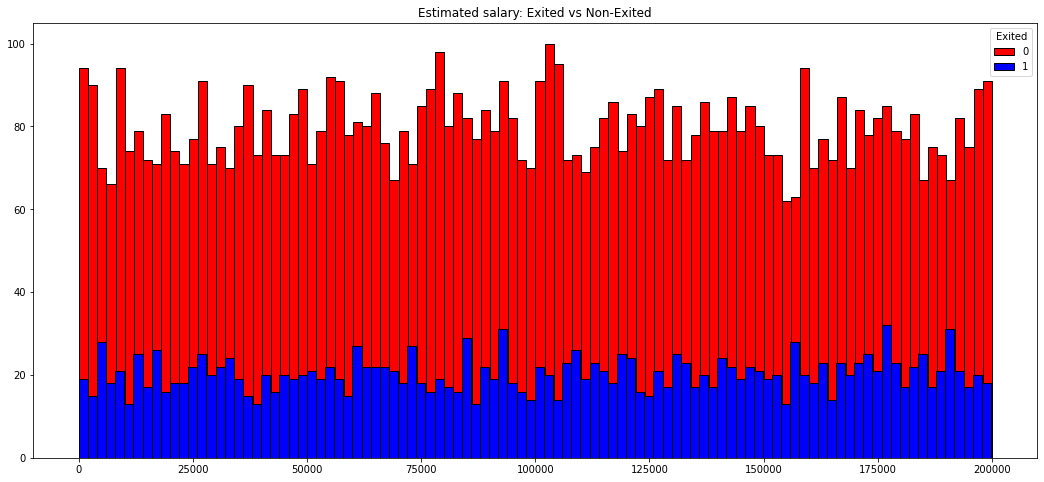

In [34]:
#Which impact does EstimatedSalary have on churn customer ?
plt.figure(figsize=(18,8))
plt.hist(x='EstimatedSalary',bins=100,data=Non_Exited,edgecolor='black',color='red')
plt.hist(x='EstimatedSalary',bins=100,data=Exited,edgecolor='black',color='blue')
plt.title('Estimated salary: Exited vs Non-Exited')
plt.legend([0,1],title='Exited');

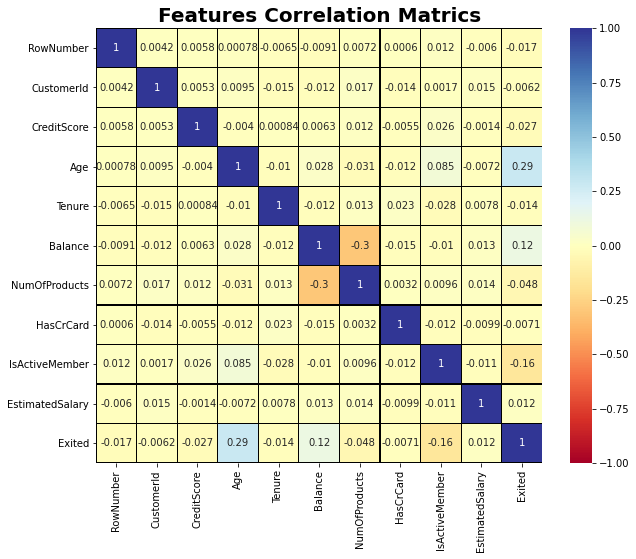

In [35]:
#Correlation analysis
plt.title("features correlation matrics".title(),
          fontsize=20,weight="bold")

sns.heatmap(data.corr(),annot=True,cmap='RdYlBu',linewidths=0.2, vmin=-1, vmax=1,linecolor = 'black') 
fig=plt.gcf()
fig.set_size_inches(10,8);